In [11]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
#bishwajitprasadgond@gmail.com
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-10 18:43:27,230: Credentials are already in use. The existing account in the session will be replaced.


ENTER LENGTH OF BIT STREAM (example 5 For 10110):1
Enter  1 or 0 bit stream 
1
List of Bit Stream to transfer over Quantum Channel
[1]


Enter  1 for H-bases and 0 for Z-bases 
1
List of ALICE bases where 1 represent H-bases and 0 represent Z-bases 
[1]


List of BOB bases where 1 represent H-bases and 0 represent Z-bases 
[1]


ALICE and BOB bases matching where X= not matched, Y= matched 
Enter the length of Identity Gate Between Quantum Channel: 300


ibmqfactory.load_account:WARNING:2021-07-13 07:54:22,372: Credentials are already in use. The existing account in the session will be replaced.


60ed46b084af823b20482704
Job Status: job has successfully run
('0', 811)




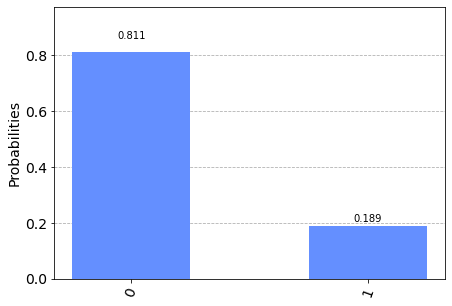

In [39]:
from qiskit.tools.monitor import backend_monitor
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random

data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
##########################################################################
print('Enter  1 or 0 bit stream ')
h=int(input())
def bit_stream(p):
    key1 = ""
    for i in range(p):
        temp = str(random.randint(h,h))
        key1 += temp
    return(key1)

bitstream= bit_stream(data)
digits = [int(x) for x in str(bitstream)]
##########################################################################
print('List of Bit Stream to transfer over Quantum Channel')
print(digits)
print('\n')
n = len(digits)
print('Enter  1 for H-bases and 0 for Z-bases ')
##########################################################################
g=int(input())
def random_bases(p):
    key1 = ""
    for i in range(p):
        temp = str(random.randint(g,g))
        key1 += temp
    return(key1)
##########################################################################
Alice_bases= random_bases(data)
Bob_bases= random_bases(data)
print('List of ALICE bases where 1 represent H-bases and 0 represent Z-bases ')
alice = [int(x) for x in str(Alice_bases)]
print(alice)
print('\n')
print('List of BOB bases where 1 represent H-bases and 0 represent Z-bases ')
bob = [int(x) for x in str(Bob_bases)]
print(bob)
###########################################################################
def check_bases(b1,b2):
    check = ''
    matches = 0
    for i in range(len(b1)):
        if b1[i] == b2[i]:
            check += "Y"
            matches += 1
        else:
            check += "X"
    return [check,matches]
print('\n')
print('ALICE and BOB bases matching where X= not matched, Y= matched ')
check_bases(Alice_bases,Bob_bases)
%matplotlib inline
###########################################################################
bob_bits=[]
m = int(input('Enter the length of Identity Gate Between Quantum Channel: '))
from random import choice
for i in range(n):
    if digits[i] == 1:
        qc= QuantumCircuit(1,1)
        qc.x(0) 
        qc.barrier()
        if alice[i]==1:
            qc.h(0)
        if alice[i]==0:
            qc.z(0)
        qc.barrier()
        for j in range(m):
            qc.id(0)
            qc.barrier()
        if bob[i]==1:
            qc.h(0)
        if bob[i]==0:
            qc.z(0)
        qc.barrier()
        qc.measure(list(range(1)),list(range(1)))
        from qiskit.tools.monitor import backend_monitor
        IBMQ.load_account()
        provider = IBMQ.get_provider(hub='ibm-q')           
        device = provider.get_backend('ibmq_armonk')       # Enable for Real Quantum Device 
        #device = Aer.get_backend('qasm_simulator')          # Enable for simulator
        job = execute(qc, backend=device, shots=1000)
        print(job.job_id())
        from qiskit.tools.monitor import job_monitor
        job_monitor(job)
        device_result = job.result()
        plot_histogram(device_result.get_counts(qc))
        bits = (device_result.get_counts(qc))
        itemMaxValue = max(bits.items(), key=lambda x : x[1])
        print(itemMaxValue)
        # Iterate over all the items in dictionary to find keys with max value
        for key, value in bits.items():
            if value == itemMaxValue[1]:
                bob_bits.append(key)
        
    if digits[i] == 0:
        qc = QuantumCircuit(1,1)
        qc.barrier()
        if alice[i]==1:
            qc.h(0)
        if alice[i]==0:
            qc.z(0)
        qc.barrier()
        for j in range(m):
            qc.id(0)
            qc.barrier()
        if bob[i]==1:
            qc.h(0)
        if bob[i]==0:
            qc.z(0)
        qc.barrier()
        qc.measure(list(range(1)),list(range(1)))
        from qiskit.tools.monitor import backend_monitor
        IBMQ.load_account()
        provider = IBMQ.get_provider(hub='ibm-q')
        device = provider.get_backend('ibmq_armonk')       # Enable for Real Quantum Device 
        #device = Aer.get_backend('qasm_simulator')          # Enable for simulator
        job = execute(qc, backend=device, shots=1000)
        print(job.job_id())
        from qiskit.tools.monitor import job_monitor
        job_monitor(job)
        device_result = job.result()
        plot_histogram(device_result.get_counts(qc))
        bits =(device_result.get_counts(qc))
        itemMaxValue = max(bits.items(), key=lambda x : x[1])
        print(itemMaxValue)
        # Iterate over all the items in dictionary to find keys with max value
        for key, value in bits.items():
            if value == itemMaxValue[1]:
                bob_bits.append(key)
    #print(qc)
    #qc.draw(output='mpl')
    print("\n")
########################################################################
def check_bits(b1,b2,bck):
    check = ''
    for i in range(len(b1)):
        if b1[i] == b2[i] and bck[i] == 'Y':
            check += 'Y'
        elif b1[i] == b2[i] and bck[i] != 'Y':
            check += 'R'
        elif b1[i] != b2[i] and bck[i] == 'Y':
            check += '!'
        elif b1[i] != b2[i] and bck[i] != 'Y':
            check += '-'
    return check
########################################################################
def transferredbits(b1,b2,bck):
    check = ''
    for i in range(len(b1)):
        if b1[i] == b2[i] and bck[i] == 'Y':
            check += 'Y'
        elif b1[i] != b2[i] and bck[i] == 'Y':
            check += '!'
    return check
########################################################################
def bob_measurement(qc,b):
    backend = Aer.get_backend('qasm_simulator')
    l = len(b)
    for i in range(l):
        if b[i] == '1':
            qc.h(i)
    qc.measure(list(range(l)),list(range(l)))
    result = execute(qc,backend,shots=1).result()
    bits = list(result.get_counts().keys())[0]

    bits = ''.join(list(reversed(bits)))
    qc.barrier()
    return [qc,bits]



In [36]:
ab_bases, ab_matches = check_bases(Alice_bases,Bob_bases)
print('ALICE and BOB bases matching where X= not matched, Y= matched ')
print("A-B bases: " + ab_bases)
print("\n")
print("Bit sent by ALICE Over Quantum Channel: " )
print(digits)
print("\n")
print("Bit Recieved by BOB Over Quantum Channel:")
integer_map = map(int, bob_bits)
bob_bit = list(integer_map)
print(bob_bit)
print("\n")
ab_bits = check_bits(bitstream,bob_bits,ab_bases)
print("A-B bits: " + ab_bits)
print("\n")
print("'Y' = Same bit recieve and both bases are same. \n'R' = Same bit recieve and both bases are not same ")
print("'!' = Opposite bit recieve and both bases are same. \n'-' = Opposite bit recieve and both bases are not same. ")
tbits= transferredbits(bitstream,bob_bits,ab_bases)
print("\n")
print("Successful A-B bits in Quantum Channel " + tbits)
print("\n")
err_found = 0
for i in range(len(ab_bits)):
    if digits[i] != bob_bit[i]:
        err_found += 1
#print(err_found)
print("Bit Flip Found:" + str(err_found) + " Bits")

error=((err_found)/(len(tbits))*100)
print("Error % of Channel")
print(error)
print("Number of Bits sent by ALICE:",len(ab_bits))
print("Correct number of Bits Recieved by BOB Over Quantum Channel", (len(tbits)-err_found))

ALICE and BOB bases matching where X= not matched, Y= matched 
A-B bases: Y


Bit sent by ALICE Over Quantum Channel: 
[1]


Bit Recieved by BOB Over Quantum Channel:
[1]


A-B bits: Y


'Y' = Same bit recieve and both bases are same. 
'R' = Same bit recieve and both bases are not same 
'!' = Opposite bit recieve and both bases are same. 
'-' = Opposite bit recieve and both bases are not same. 


Successful A-B bits in Quantum Channel Y


Bit Flip Found:0 Bits
Error % of Channel
0.0
Number of Bits sent by ALICE: 1
Correct number of Bits Recieved by BOB Over Quantum Channel 1
